### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.
3. Decide what to do about your missing data -- drop, replace, other...

Check data for null values

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

With null values so high in car (12576); look to see what type of values are normal there.

In [ ]:
data['car'].value_counts()

car
no car                                      12576
Scooter and motorcycle                         22
Mazda5                                         22
do no cart drive                               22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

Replace the "no" in car to "no car" so that it doesn't trigger the null values.

In [ ]:
data['car'] = data['car'].str.replace('no', 'no car')

Check other small amount of null values

In [18]:
print(data['Bar'].value_counts())
print(data['CoffeeHouse'].value_counts())
print(data['CarryAway'].value_counts())
print(data['RestaurantLessThan20'].value_counts())
print(data['Restaurant20To50'].value_counts())


Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


I think that it is fair to change the null values of the establishment null values to never.

In [19]:
data['Bar'] = data['Bar'].fillna('never')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')
data['CarryAway'] = data['CarryAway'].fillna('never')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('never')

4. What proportion of the total observations chose to accept the coupon?



In [20]:
proportion_accepted = data['Y'].sum() / data['Y'].count()
print(proportion_accepted)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

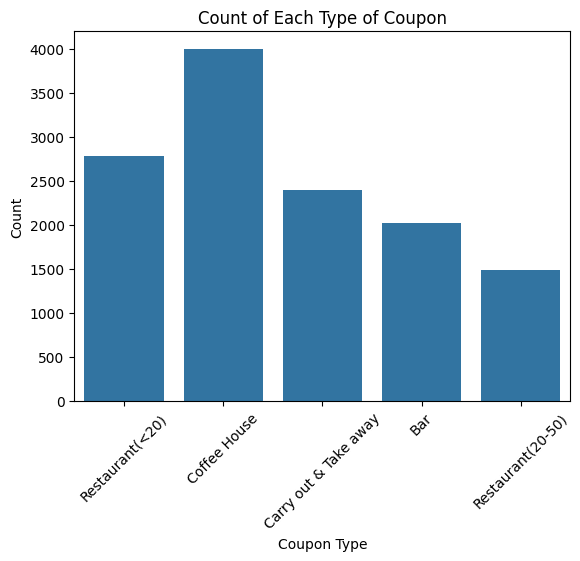

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=data, x='coupon')
plt.title('Count of Each Type of Coupon')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.savefig('images/count_of_each_coupon.png')

6. Use a histogram to visualize the temperature column.

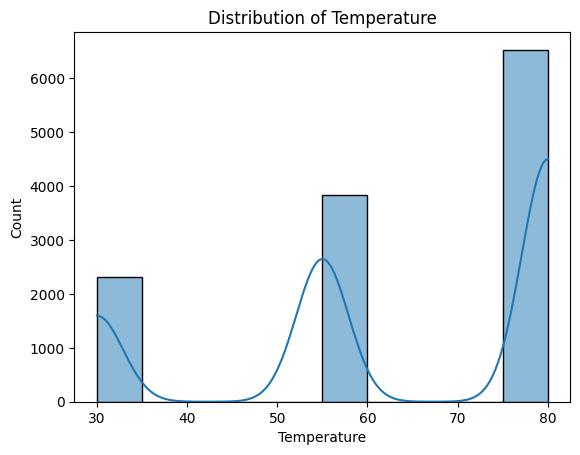

<Figure size 640x480 with 0 Axes>

In [27]:
sns.histplot(data['temperature'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()
plt.savefig('images/distribution_of_temperature.png')

Separate out the temperature groups to see how much temperature may affect acceptance.

In [29]:
temp_30_40 = data[(data['temperature'] >= 30) & (data['temperature'] <= 40)]
temp_50_60 = data[(data['temperature'] >= 50) & (data['temperature'] <= 60)]
temp_70_80 = data[(data['temperature'] >= 70) & (data['temperature'] <= 80)]

In [30]:
low_temp_acceptance = temp_30_40['Y'].sum() / temp_30_40['Y'].count()
print(low_temp_acceptance)

0.5310880829015544


In [31]:
mid_temp_acceptance = temp_50_60['Y'].sum() / temp_50_60['Y'].count()
print(mid_temp_acceptance)

0.53671875


In [32]:
high_temp_acceptance = temp_70_80['Y'].sum() / temp_70_80['Y'].count()
print(high_temp_acceptance)

0.6003370098039216


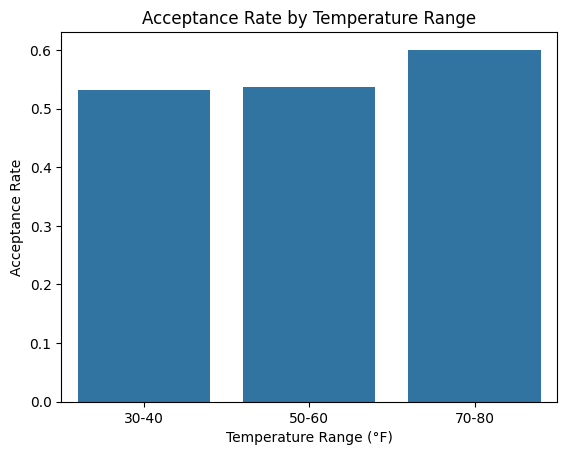

<Figure size 640x480 with 0 Axes>

In [33]:
# Create a DataFrame for the acceptance rates
acceptance_rates = pd.DataFrame({
    'Temperature Range': ['30-40', '50-60', '70-80'],
    'Acceptance Rate': [low_temp_acceptance, mid_temp_acceptance, high_temp_acceptance]
})

# Plot the histogram
sns.barplot(data=acceptance_rates, x='Temperature Range', y='Acceptance Rate')
plt.title('Acceptance Rate by Temperature Range')
plt.xlabel('Temperature Range (°F)')
plt.ylabel('Acceptance Rate')
plt.show()
plt.savefig('images/acceptance_rate_by_temperature_range.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [37]:
bar_coupon = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [42]:
bar_accepted = bar_coupon['Y'].sum() / bar_coupon['Y'].count()
print(bar_accepted)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [43]:
# never    5197
# less1    3482
# 1~3      2473
# 4~8      1076
# gt8       349

threeorless = bar_coupon[(bar_coupon['Bar'] == 'never') | (bar_coupon['Bar'] == 'less1') | (bar_coupon['Bar'] == '1~3')]
fourorgreater = bar_coupon[(bar_coupon['Bar'] == '4~8') | (bar_coupon['Bar'] == 'gt8')]


In [40]:
threeorless_accepted = threeorless['Y'].sum() / threeorless['Y'].count()
fourorgreater_accepted = fourorgreater['Y'].sum() / fourorgreater['Y'].count()

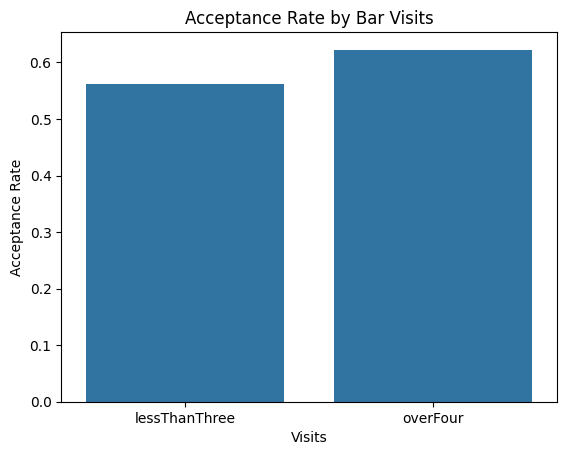

<Figure size 640x480 with 0 Axes>

In [41]:
# Create a DataFrame for the acceptance rates
bar_acceptance = pd.DataFrame({
    'Visits': ['lessThanThree', 'overFour'],
    'Acceptance Rate': [threeorless_accepted, fourorgreater_accepted]
})

# Plot the histogram
sns.barplot(data=bar_acceptance, x='Visits', y='Acceptance Rate')
plt.title('Acceptance Rate by Bar Visits')
plt.xlabel('Visits')
plt.ylabel('Acceptance Rate')
plt.show()
plt.savefig('images/acceptance_rate_by_bar_visits.png')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
# Clean the age column.
bar_coupon['age'] = bar_coupon['age'].str.replace('50plus', '50')
bar_coupon['age'] = bar_coupon['age'].str.replace('below21', '20')

In [ ]:
# Ensure explicit assignment when modifying columns
bar_coupon.loc[:, 'age'] = bar_coupon['age'].astype(str)

# Drop missing values
bar_coupon = bar_coupon.dropna(subset=['age', 'Bar', 'Y'])

# Create groups based on requirements.
group1 = bar_coupon.loc[
    (bar_coupon['age'].apply(lambda x: int(x.split()[0]) > 25)) &
    (~bar_coupon['Bar'].isin(['never', 'less1']))
]

group2 = bar_coupon.loc[~(
    (bar_coupon['age'].apply(lambda x: int(x.split()[0]) > 25)) &
    (~bar_coupon['Bar'].isin(['never', 'less1']))
)]


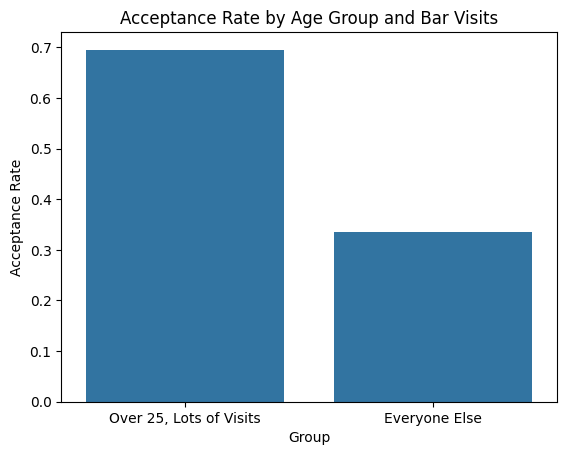

<Figure size 640x480 with 0 Axes>

In [53]:
# Calculate the acceptance rates for each group
group1_acceptance = group1['Y'].sum() / group1['Y'].count()
group2_acceptance = group2['Y'].sum() / group2['Y'].count()

# Graph the acceptance rates
bar_acceptance = pd.DataFrame({
    'Group': ['Over 25, Lots of Visits', 'Everyone Else'],
    'Acceptance Rate': [group1_acceptance, group2_acceptance]
})

sns.barplot(data=bar_acceptance, x='Group', y='Acceptance Rate')
plt.title('Acceptance Rate by Age Group and Bar Visits')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()
plt.savefig('images/acceptance_rate_by_age_group_and_bar_visits.png')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [56]:
# Check values for passenger, occupation
print(data['passanger'].value_counts())
print(data['occupation'].value_counts())

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service        

In [59]:
# Create groups based on requirements.
group3 = bar_coupon.loc[
    (bar_coupon['passanger'].isin(['Friends(s)', 'Partner'])) &
    (~bar_coupon['Bar'].isin(['never', 'less1'])) &
    (~bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))
]

group4 = bar_coupon.loc[~(
    (bar_coupon['passanger'].isin(['Friends(s)', 'Partner'])) &
    (~bar_coupon['Bar'].isin(['never', 'less1'])) &
    (~bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))
)]

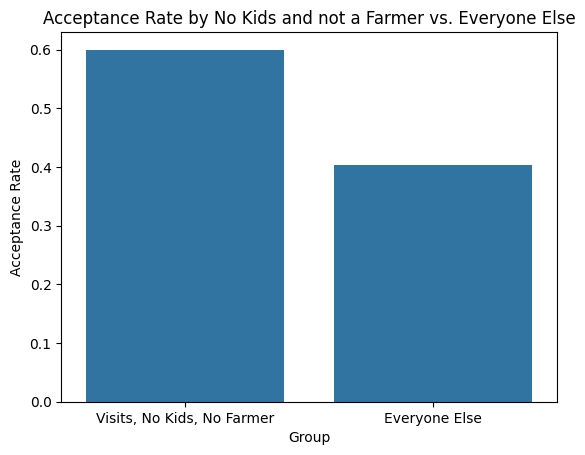

<Figure size 640x480 with 0 Axes>

In [60]:
# Generate the acceptance rates for each group
# Calculate the acceptance rates for each group
group3_acceptance = group3['Y'].sum() / group3['Y'].count()
group4_acceptance = group4['Y'].sum() / group4['Y'].count()

# Graph the acceptance rates
bar_acceptance = pd.DataFrame({
    'Group': ['Visits, No Kids, No Farmer', 'Everyone Else'],
    'Acceptance Rate': [group3_acceptance, group4_acceptance]
})

sns.barplot(data=bar_acceptance, x='Group', y='Acceptance Rate')
plt.title('Acceptance Rate by No Kids and not a Farmer vs. Everyone Else')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()
plt.savefig('images/acceptance_rate_by_no_kids_and_farmer.png')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
# Get a list of what income values we have.
bar_coupon['income'].value_counts()

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

In [63]:
# Create groups based on requirements.
group5 = bar_coupon.loc[
    (bar_coupon['passanger'].isin(['Friends(s)', 'Partner'])) &
    (~bar_coupon['Bar'].isin(['never', 'less1'])) &
    (~bar_coupon['maritalStatus'].isin(['widowed']))
]

group6 = bar_coupon.loc[
    (bar_coupon['age'].apply(lambda x: int(x.split()[0]) < 30)) &
    (~bar_coupon['Bar'].isin(['never', 'less1']))
]

group7 = bar_coupon.loc[
    (bar_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupon['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

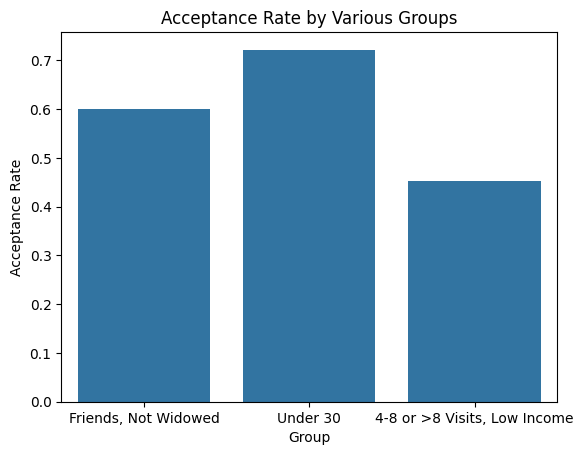

<Figure size 640x480 with 0 Axes>

In [64]:
# Calculate the acceptance rates for each group
group5_acceptance = group5['Y'].sum() / group5['Y'].count()
group6_acceptance = group6['Y'].sum() / group6['Y'].count()
group7_acceptance = group7['Y'].sum() / group7['Y'].count()

# Graph the acceptance rates
bar_acceptance = pd.DataFrame({
    'Group': ['Friends, Not Widowed', 'Under 30', '4-8 or >8 Visits, Low Income'],
    'Acceptance Rate': [group5_acceptance, group6_acceptance, group7_acceptance]
})

sns.barplot(data=bar_acceptance, x='Group', y='Acceptance Rate')
plt.title('Acceptance Rate by Various Groups')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()
plt.savefig('images/acceptance_rate_by_various_groups.png')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Bar Results

Based on what I have gathered within the graphs that we have produced is that the people that are going to the bar are typically under 30 yrs of age with no children and have well paying jobs.

It doesn't matter if they have a partner or are single and they tend to be frequent visitors.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  